### MNIST dataset을 이용해 숫자 손글씨 구분하기

* CNN = Convolutional Neural Network

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

In [2]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

Using TensorFlow backend.


In [3]:
print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
TensorFlow version :  1.14.0
Keras version :  2.2.4


In [4]:
img_rows = 28
img_cols = 28

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# x_train과 y_train이 모델이 학습해야 할 training set를 구성한다.
# 모델은 x_test, y_test로 구성된 test set에서 테스트된다.
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


In [6]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28*28)크기인 배열로 타입 변경

In [7]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#훈련 데이터 6만개, 28*28, 1D tensor

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
batch_size = 128
num_classes = 10
epochs = 12

# batch size는 data set을 batch size의 크기만큼씩 나눠서 훈련하도록 함.
# epoch 는 전체 훈련 데이터에 수행되는 반복 횟수, epoch값이 너무 작으면 underfitting이, 너무 크면 overfitting이 발생할 확률이 높아짐.
# num_classes, 0~9까지 10개

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# layer는 데이트 처리 필터, 층은 주어진 문제에 더 의미있는 표현을 입력된 데이터로부터 추출한다.

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))



### network 구성하기
--------------------------
1. Sequential 함수로 model class 생성
2. add 메서드로 layer 추가
    - 입력층부터 순서대로 추가
    - activation 인수로 activation function 설정 (sigmoid, relu 등)
    - 출력 뉴런 갯수를 첫번째 인자로 설정
    - 제일 처음 layer는 input_dim, input_shape 인수 등을 통해 입력 크기 설정
3. compile 메서드로 model 완성
    - loss인수로 비용함수 설정
    - optimizer 인수로 최적화 알고리즘 설정
    - metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정
4. fit 메서드로 training

### activation funtion
-----------------------------
* linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력
* relu : hidden layer에 주로 사용
* sigmoid : 이진 분류 문제에서 출력층에서 주로 사용
* softmax : 다중 클래스 분류 문제에서 출력층에서 주로 사용

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________________________

### layer
------------------------------
1. Convolution layer
    - Conv2D(filter, kernal_size=(rows, colums),
    
2. MaxPooling
3. Flatten

https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# 네트워크 손실(loss)과 정확도(acc) 표시
# optimizer: 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1892 - acc: 0.9406 - val_loss: 0.0535 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0628 - acc: 0.9806 - val_loss: 0.0346 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0463 - acc: 0.9856 - val_loss: 0.0263 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0371 - acc: 0.9879 - val_loss: 0.0305 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0311 - acc: 0.9906 - val_loss: 0.0248 - val_acc: 0.9919
Epoch 6/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0280 - acc: 0.9907 - val_loss: 0.0226 - val_acc: 0.9919
Epoch 7/12
60000/60000 [========

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.021586100698614337
Test accuracy:  0.9929


> 틀린 샘플 확인하는 코드


In [15]:
import random

In [16]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []


In [17]:
for n in range(0, len(test_labels)):
    if predicted_labels[n]!=test_labels[n]:
        wrong_result.append(n)
        
        

In [18]:
samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols =4

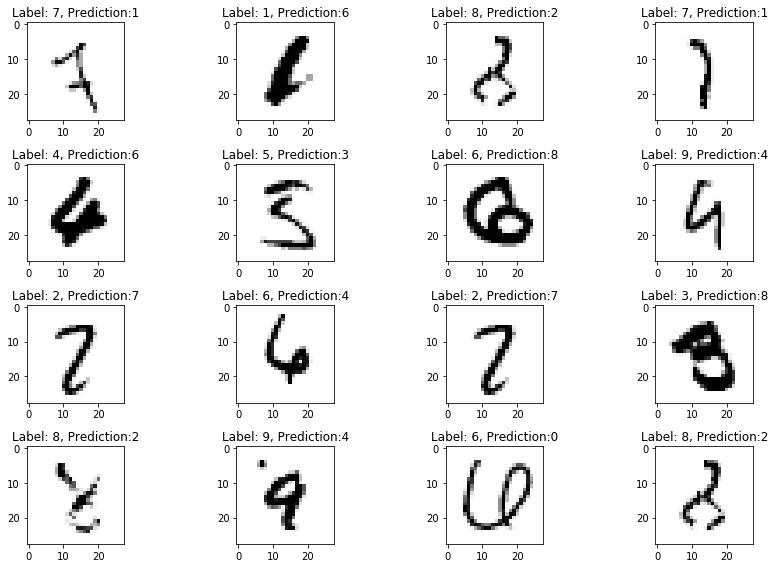

In [21]:
plt.figure(figsize=(12, 8))

for n in samples:
    count+=1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label: "+ str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)
    
    
plt.tight_layout()
plt.show()